# Introduction To Exploratory Data Analysis

## Steps You Need To Follow

1. Select A Dataset
2. Perform data cleaning and preparation
3. Perform EDA and data visualization
4. List questions you want to ask and answer
5. Summarize your inferences and write a conclusion
6. Document and publish your report

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style("darkgrid")

### 1. Select A Dataset

We are going to download our dataset from [Kaggle](https://www.kaggle.com/sobhanmoosavi/us-accidents/metadata).

You can read about the dataset and what its all about for more info to work with.

### 2. Preform data cleaning and preparation

- Load dataset
- Inspect dataset to know columna row and basic info
- Find if missing values exist in dataset

In [3]:
df = pd.read_csv("datasets/US_Accidents_Dec20_updated.csv")

### First Five Rows

In [4]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


### DataFrame Shape

In [5]:
df.shape

(1516064, 47)

### Columns

You can read about the different columns and what each represents on the dataset docs.

In [6]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

### Descriptive Statistics

In [8]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


## Questions

- [ ] Are there more accidents in colder or warmer areas?
- [X] Which 5 cities has the most number of accidents per capital?
- [X] Which states have most accidents
- [X] Which time of the day do most accidents occure
- [X] Which day of the week has most accidents
- [X] Trend of accidents year to year
- [X] Where are most accidents occuring

### Dealing with numeric data types

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include = numerics)

In [10]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Severity           1516064 non-null  int64  
 1   Start_Lat          1516064 non-null  float64
 2   Start_Lng          1516064 non-null  float64
 3   End_Lat            1516064 non-null  float64
 4   End_Lng            1516064 non-null  float64
 5   Distance(mi)       1516064 non-null  float64
 6   Number             469969 non-null   float64
 7   Temperature(F)     1473031 non-null  float64
 8   Wind_Chill(F)      1066748 non-null  float64
 9   Humidity(%)        1470555 non-null  float64
 10  Pressure(in)       1479790 non-null  float64
 11  Visibility(mi)     1471853 non-null  float64
 12  Wind_Speed(mph)    1387202 non-null  float64
 13  Precipitation(in)  1005515 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 161.9 MB


### Missing values

In [11]:
percentages_missing = (df.isna().sum().sort_values(ascending=False) / len(df)) * 100
percentages_missing

Number                   69.000715
Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Weather_Timestamp         1.996222
Airport_Code              0.280199
Timezone                  0.151841
Zipcode                   0.061673
Sunrise_Sunset            0.005475
Civil_Twilight            0.005475
Nautical_Twilight         0.005475
Astronomical_Twilight     0.005475
City                      0.005475
Country                   0.000000
Give_Way                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                      0.000000
Station             

In [12]:
percentages_missing = percentages_missing[percentages_missing != 0]

<AxesSubplot:>

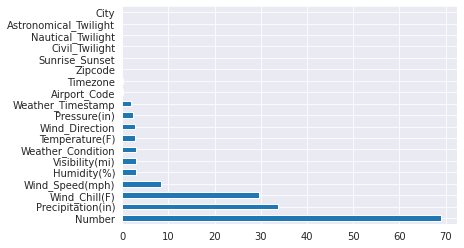

In [13]:
percentages_missing.plot(kind="barh")

### Cities

In [14]:
cities = df.City.unique()
len(cities)

10658

In [15]:
cities

array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Succasunna', 'Valleyford',
       'American Fork-Pleasant Grove'], dtype=object)

In [16]:
cities[:100]

array(['Dublin', 'Dayton', 'Cincinnati', 'Akron', 'Williamsburg',
       'Batavia', 'Cleveland', 'Lima', 'Westerville', 'Jamestown',
       'Freeport', 'Columbus', 'Toledo', 'Roanoke', 'Ft Mitchell',
       'Edinburgh', 'Fairborn', 'Shelbyville', 'Greensburg', 'Saint Paul',
       'Parkersburg', 'Indianapolis', 'Dundee', 'Jeffersonville',
       'Pittsburgh', 'Lewis Center', 'Dunkirk', 'Redkey', 'Milton',
       'Willshire', 'Straughn', 'Cambridge Springs', 'Fremont',
       'Louisville', 'South Charleston', 'Edinboro', 'Buckhannon',
       'Lockbourne', 'Painesville', 'Washington', 'Dunbar', 'Angola',
       'Edon', 'Medina', 'De Mossville', 'New Albany', 'Charleston',
       'Fort Wayne', 'Burnsville', 'Bedford', 'Clarksville', 'Lakewood',
       'Richfield', 'Sewickley', 'Independence', 'Westlake', 'Erlanger',
       'Grove City', 'Monroe', 'West Middlesex', 'Gaston', 'Economy',
       'Fairmount', 'Hagerstown', 'Walton', 'Crittenden', 'Coraopolis',
       'Holland', 'Greenfield', '

In [17]:
accidents_by_city = df.City.value_counts().sort_values(ascending = False)
accidents_by_city

Los Angeles                     39984
Miami                           36233
Charlotte                       22203
Houston                         20843
Dallas                          19497
                                ...  
Holmen                              1
Heuvelton                           1
Downing                             1
Glenwood City                       1
American Fork-Pleasant Grove        1
Name: City, Length: 10657, dtype: int64

<AxesSubplot:>

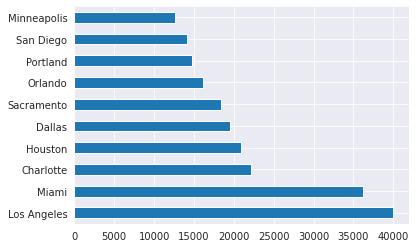

In [18]:
accidents_by_city[:10].plot(kind="barh")

/home/prince/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


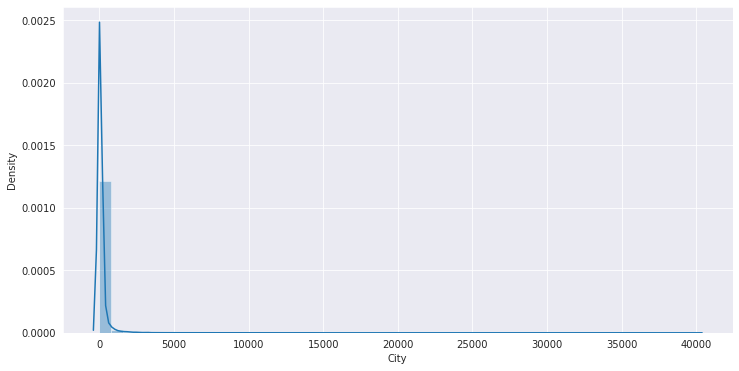

In [19]:
plt.figure(figsize = (12, 6))
sns.distplot(accidents_by_city)
plt.show()

We can see that most cities have less than 5000 accidents

In [20]:
high_accident_cities = accidents_by_city[accidents_by_city >= 5000]
low_accident_cities = accidents_by_city[accidents_by_city < 5000]

In [21]:
high_accident_cities_percent = len(high_accident_cities) / len(accidents_by_city)
high_accident_cities_percent

0.003753401520127616

/home/prince/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


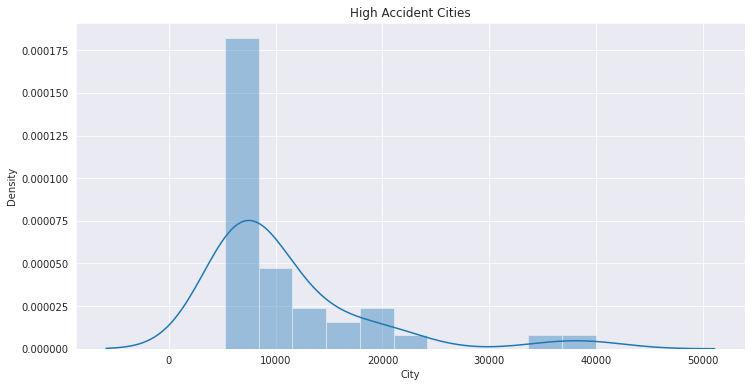

In [22]:
plt.figure(figsize = (12, 6))
sns.distplot(high_accident_cities)
plt.title("High Accident Cities")
plt.show()

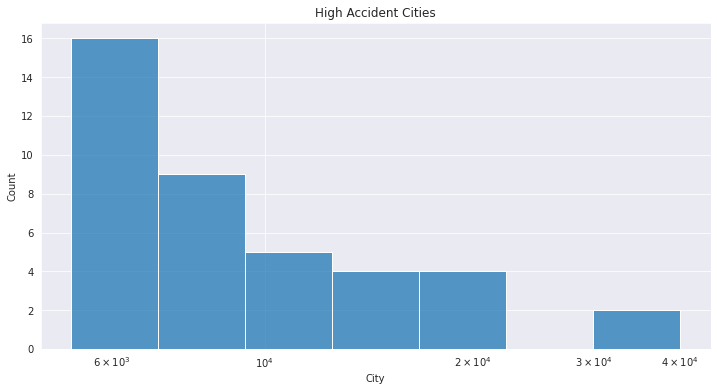

In [23]:
plt.figure(figsize = (12, 6))
sns.histplot(high_accident_cities, log_scale = True)
plt.title("High Accident Cities")
plt.show()

In [24]:
low_accident_cities_percent = len(low_accident_cities) / len(accidents_by_city)
low_accident_cities_percent

0.9962465984798724

/home/prince/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


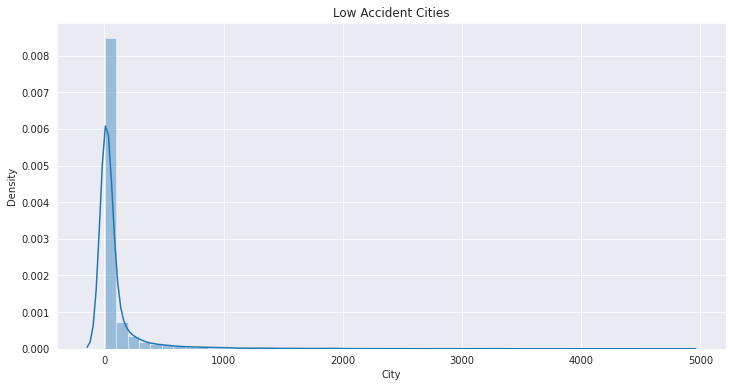

In [25]:
plt.figure(figsize = (12, 6))
sns.distplot(low_accident_cities)
plt.title("Low Accident Cities")
plt.show()

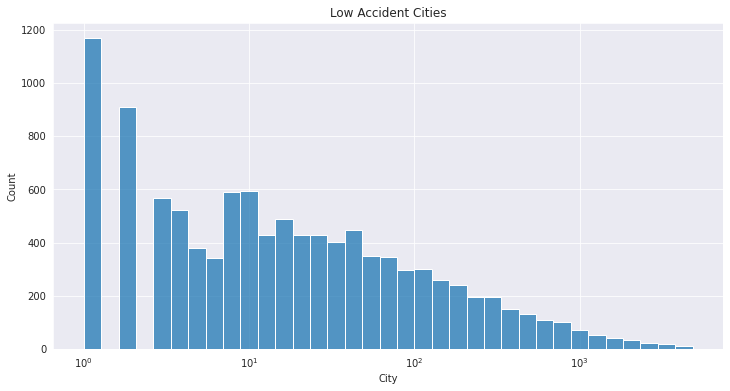

In [26]:
plt.figure(figsize = (12, 6))
sns.histplot(low_accident_cities, log_scale = True)
plt.title("Low Accident Cities")
plt.show()

More than 99% of all cities have less than 5000 accidents.

Alot of cities have only one accident $10^0 = 1$

In [27]:
cities_with_one_accident = accidents_by_city[accidents_by_city == 1]
len(cities_with_one_accident)

1167

## Time Analysis

In [28]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

In [29]:
type(df.Start_Time[0])

str

### Parse Datetime

In [30]:
df["Start_Time"] = pd.to_datetime(df.Start_Time)

In [31]:
type(df.Start_Time[0])

pandas._libs.tslibs.timestamps.Timestamp

### Get Hour Informations

In [32]:
df.Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           6
           ..
1516059    18
1516060    19
1516061    19
1516062    19
1516063    18
Name: Start_Time, Length: 1516064, dtype: int64

<AxesSubplot:ylabel='Frequency'>

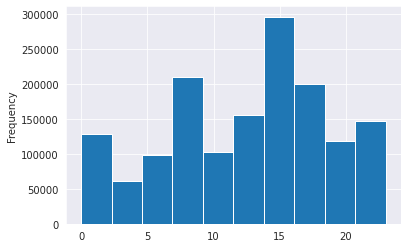

In [33]:
df.Start_Time.dt.hour.plot(kind="hist")

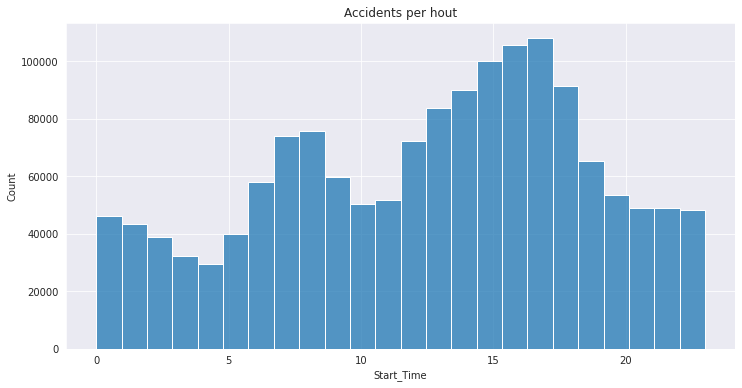

In [34]:
plt.figure(figsize=(12, 6))
# 24 bins each for an hour in a day
sns.histplot(df.Start_Time.dt.hour, bins=24)
plt.title("Accidents per hout")
plt.show()

Most accidents occur around 1500 to 1700

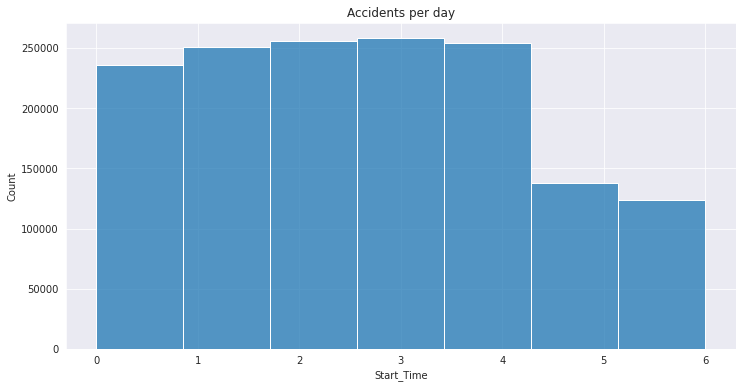

In [35]:
plt.figure(figsize=(12, 6))
# 7 bins each for an days in a week
sns.histplot(df.Start_Time.dt.dayofweek, bins=7)
plt.title("Accidents per day")
plt.show()

Traffics are not intensive on weekends as on week days

### Accident Trends Days

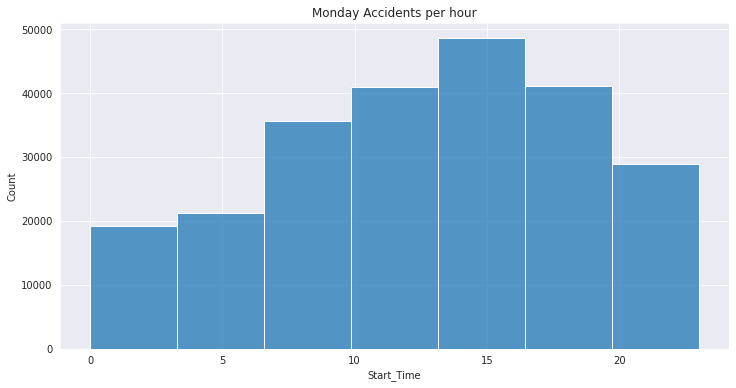

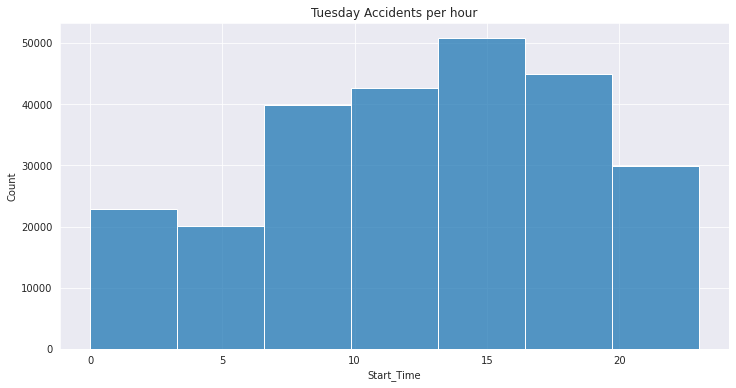

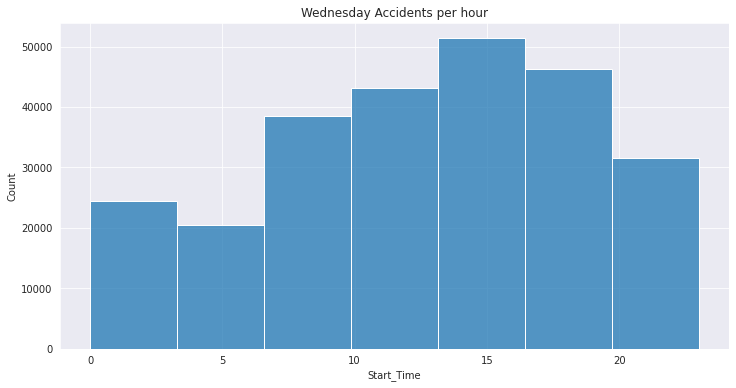

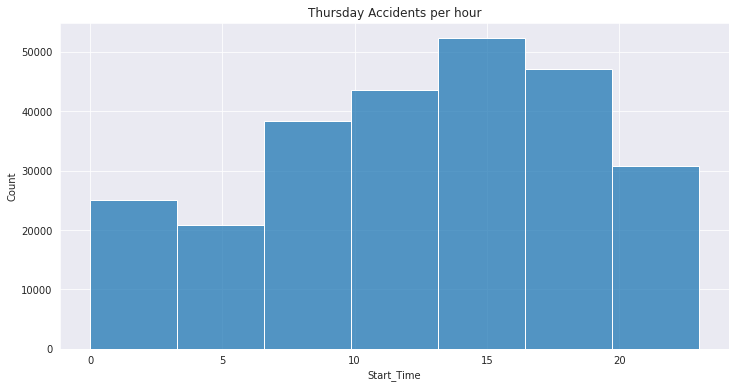

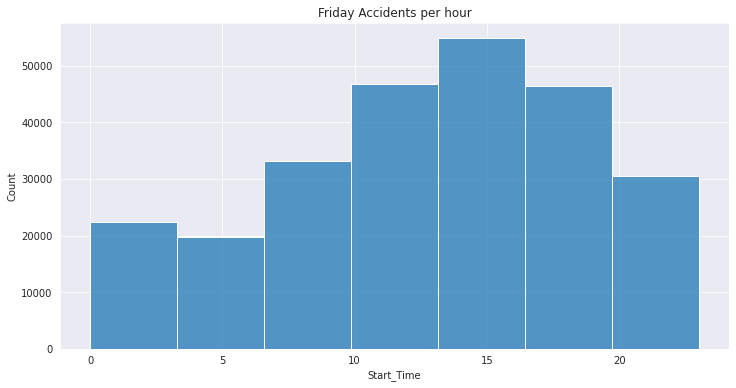

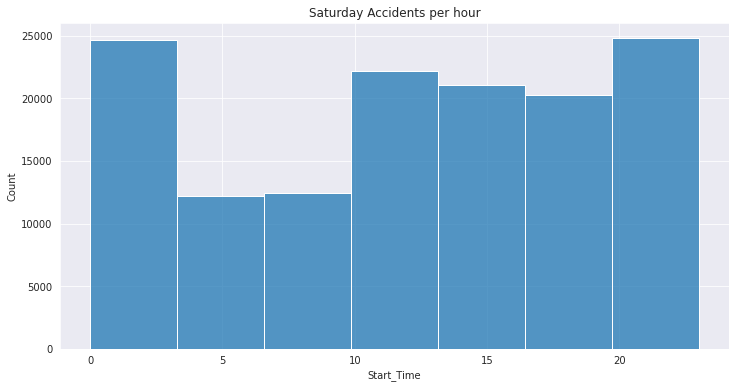

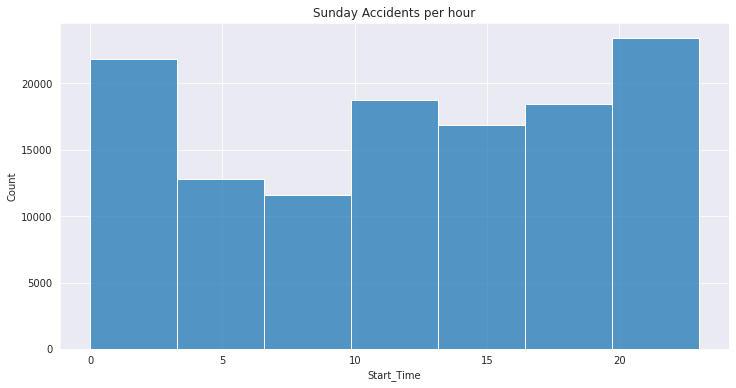

In [36]:
day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
for day in range(7):
    day_data = df.Start_Time[df.Start_Time.dt.dayofweek == day]
#     print(day_data)
    day_name = day_names[day]
    plt.figure(figsize=(12, 6))
    # 7 bins each for an days in a week
    sns.histplot(day_data.dt.hour, bins=7)
    plt.title(day_name + " Accidents per hour")
    plt.show()

### Monthly Accident Data

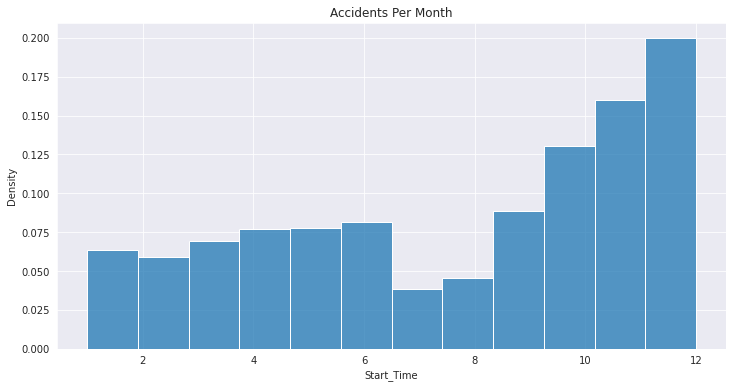

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(df.Start_Time.dt.month, bins=12, stat="density")
plt.title("Accidents Per Month")
plt.show()

### Yearly Trend

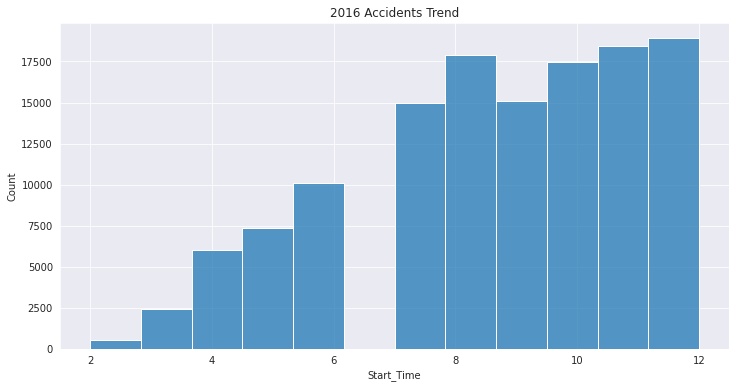

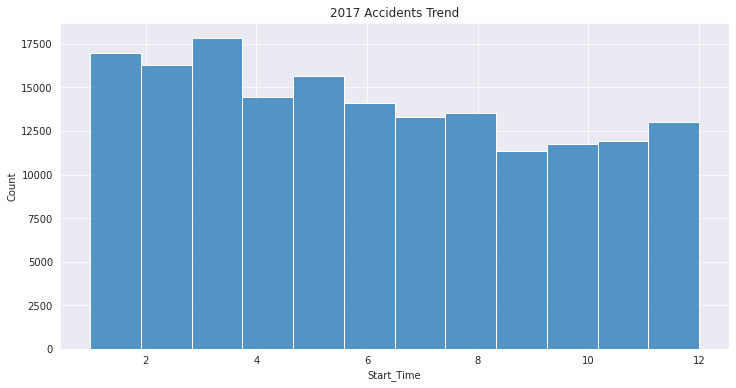

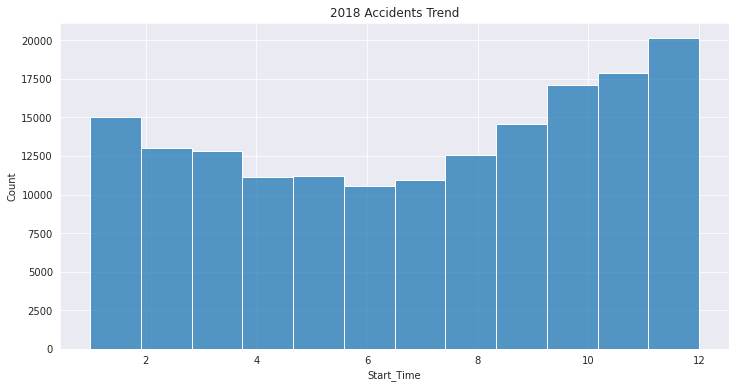

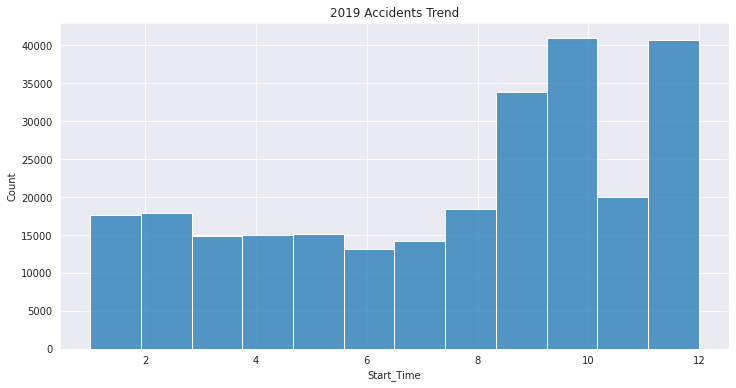

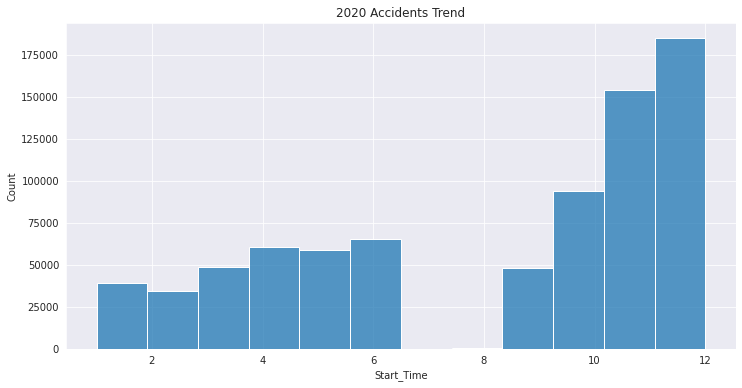

In [38]:
year_names = [2016, 2017, 2018, 2019, 2020]
for year in year_names:
    year_data = df.Start_Time[df.Start_Time.dt.year == year]
    plt.figure(figsize=(12, 6))
    sns.histplot(year_data.dt.month, bins=12)
    plt.title(str(year) + " Accidents Trend")
    plt.show()

## Locations Where Accidents Occur

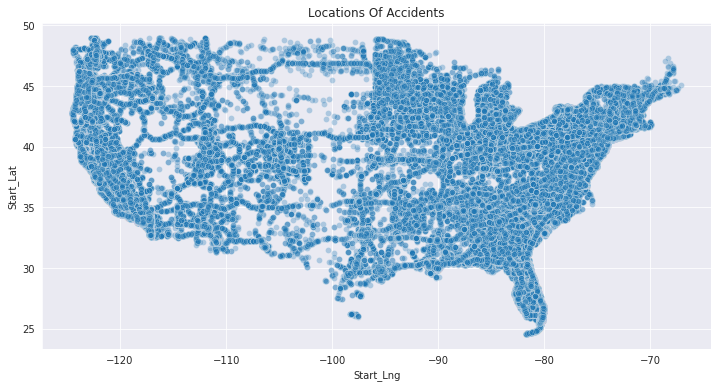

In [39]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x = df.Start_Lng, y = df.Start_Lat, sizes =0.001, alpha = 0.3)
plt.title("Locations Of Accidents")
plt.show()

## Which State Has The Most Accidents

In [48]:
df[["City", "State"]]

,City,State
0,Dublin,OH
1,Dayton,OH
2,Cincinnati,OH
3,Cincinnati,OH
4,Akron,OH
...,...,...
1516059,Riverside,CA
1516060,San Diego,CA
1516061,Orange,CA
1516062,Culver City,CA


In [72]:
most_accidents_per_state = df.groupby(["State"]).City.value_counts()
# most_accidents_per_state

In [70]:
most_accidents_per_state = most_accidents_per_state.groupby(["State"]).sum().sort_values(ascending=False)
# most_accidents_per_state

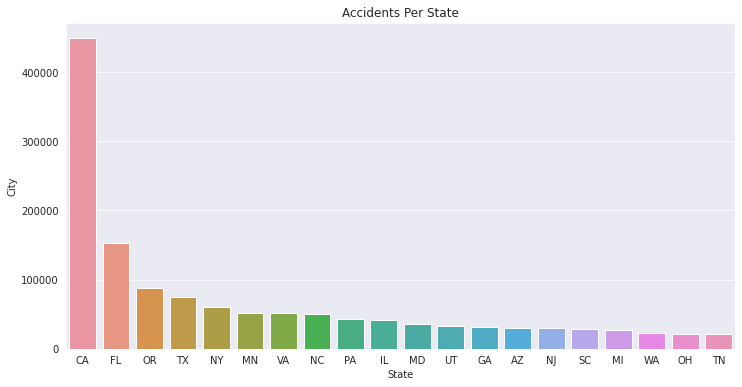

In [71]:
plt.figure(figsize = (12, 6))
sns.barplot(x=most_accidents_per_state.index[:20], y = most_accidents_per_state[:20])
plt.title("Accidents Per State")
plt.show()

### Correlation Between Visibility And Severity Of Accidents

In [75]:
df[["Severity", "Visibility(mi)"]].head()

,Severity,Visibility(mi)
0,3,10.0
1,2,10.0
2,2,10.0
3,2,10.0
4,2,10.0


In [81]:
sev_vis_ratio = df[["Severity", "Visibility(mi)"]].corr()
sev_vis_ratio

,Severity,Visibility(mi)
Severity,1.000000,0.006275
Visibility(mi),0.006275,1.000000


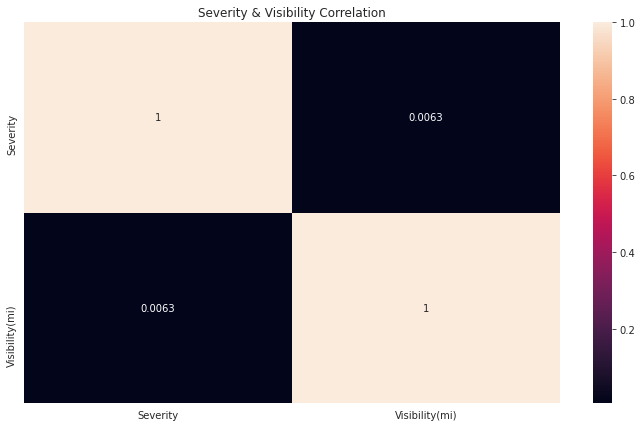

In [90]:
plt.figure(figsize = (12, 7))
sns.heatmap(sev_vis_ratio, annot=True)
plt.title("Severity & Visibility Correlation")
plt.show()

### Impact Of Weather Conditions On Accidents

In [94]:
weather_condition_impact_series = df.Weather_Condition.value_counts()
weather_condition_impact_series

Fair                     465252
Mostly Cloudy            193595
Clear                    180223
Cloudy                   161291
Partly Cloudy            133102
                          ...  
Dust Whirls                   1
Drifting Snow                 1
Thunder and Hail              1
Mist / Windy                  1
Freezing Rain / Windy         1
Name: Weather_Condition, Length: 116, dtype: int64

In [105]:
list(weather_condition_impact_df)[:10]

[465252, 193595, 180223, 161291, 133102, 87853, 72511, 47061, 22113, 19777]

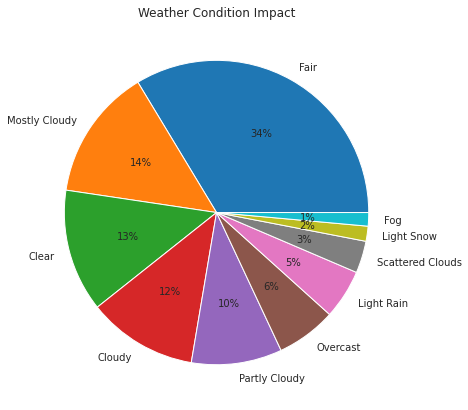

In [109]:
plt.figure(figsize = (12, 7))
plt.pie(x=list(weather_condition_impact_df)[:10], labels=weather_condition_impact_df.index[:10], autopct = '%0.0f%%')
plt.title("Weather Condition Impact")
plt.show()

### Accident Locations

In [118]:
locations = df.columns[30:43]
locations

Index(['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop'],
      dtype='object')

In [140]:
locations_df = df[locations]
locations_df.replace({False: 0, True: 1}, inplace=True)
locations_series = locations_df.sum()
locations_series

Amenity             12403
Bump                  261
Crossing            86383
Give_Way             3255
Junction           204498
No_Exit              1729
Railway             12584
Roundabout             51
Station             28147
Stop                17696
Traffic_Calming       489
Traffic_Signal     169969
Turning_Loop            0
dtype: int64

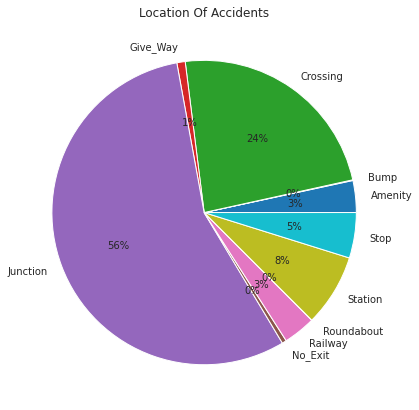

In [142]:
plt.figure(figsize = (12, 7))
plt.pie(x=list(locations_series)[:10], labels=locations_series.index[:10], autopct = '%0.0f%%')
plt.title("Location Of Accidents")
plt.show()

## Conclusion and Inference

- More than 99% of all cities have less than 5000 accidents.
- Only 0.3% of cities have more than are exactly 5000 accidents
- Number of accidents per city decreases exponentially
- State Of California has the most number of accidents
- Severity of accidents is not much affected by the visibility
- Most of the accidents(34%) happen in fair weather conditions
- 56% of all accidents occur on junctions